In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import json
%matplotlib inline

In [69]:
df = pd.read_csv('/Volumes/researchFiles/amz_files/A_TBvsHealthy-synthetic.csv')

In [70]:
df.skew()
df.describe()

target = 'TB-31S'
df = df.drop(columns=[target])
correlation_mat = df.corr()

series = []
for ind in correlation_mat.index:
    obj = {}
    obj['name'] = ind
    obj['data'] = []
    for x,y in correlation_mat[ind].iteritems():
        obj['data'].append({
            'x':x,
            'y':y
        })
    series.append(obj)
series


[{'name': ' Rv3881  ',
  'data': [{'x': ' Rv3881  ', 'y': 1.0},
   {'x': ' Rv0934', 'y': 0.5831544786700646},
   {'x': ' HSPX  ', 'y': -0.030062309562652188},
   {'x': ' Ag85b ', 'y': 0.05419644050459416},
   {'x': ' Rv1860', 'y': 0.009220853985418099},
   {'x': 'CFP10  ', 'y': 0.21917877049240664},
   {'x': '  Rv1926c ', 'y': 0.22801584756133636},
   {'x': ' Rv1984 ', 'y': 0.0988570801472357},
   {'x': ' Rv3841', 'y': 0.11577774488102491},
   {'x': ' Rv2875 ', 'y': -0.025518865204601004},
   {'x': ' H37Rv ', 'y': 0.3137726736405121},
   {'x': ' HN878  ', 'y': 0.14470713018616874},
   {'x': ' CDC1551  ', 'y': 0.1572292573829748},
   {'x': 'Rv3418c ', 'y': 0.45295107744444724},
   {'x': ' Rv3507 ', 'y': 0.3074471709818346},
   {'x': 'Rv3875', 'y': 0.03910111501701091},
   {'x': 'Rv3804c ', 'y': 0.0551831206827005},
   {'x': 'Rv3874-Rv3875', 'y': 0.09293745433468593},
   {'x': ' Rv2878c  ', 'y': 0.23847712630610818},
   {'x': ' Rv1099 ', 'y': 0.08572262103084415},
   {'x': ' Rv3619  ', '

In [7]:
correlation_mat = df.corr()
corr_pairs = correlation_mat.unstack()


print(corr_pairs)

 Rv3881     Rv3881      1.000000
            Rv0934      0.583154
            HSPX       -0.030062
            Ag85b       0.054196
            Rv1860      0.009221
                          ...   
TB-31S     Rv0129c      0.034886
            Rv1009     -0.008519
            Rv1980      0.039126
            Rv0831     -0.113039
           TB-31S       1.000000
Length: 1024, dtype: float64


In [57]:
series = []
for ind in correlation_mat.index:
    obj = {}
    obj['name'] = ind
    obj['data'] = []
    for x,y in correlation_mat[ind].iteritems():
        obj['data'].append({
            'x':x,
            'y':y
        })
    series.append(obj)
series

[{'name': ' Rv3881  ',
  'data': [{'x': ' Rv3881  ', 'y': 1.0},
   {'x': ' Rv0934', 'y': 0.5831544786700646},
   {'x': ' HSPX  ', 'y': -0.030062309562652188},
   {'x': ' Ag85b ', 'y': 0.05419644050459416},
   {'x': ' Rv1860', 'y': 0.009220853985418099},
   {'x': 'CFP10  ', 'y': 0.21917877049240664},
   {'x': '  Rv1926c ', 'y': 0.22801584756133636},
   {'x': ' Rv1984 ', 'y': 0.0988570801472357},
   {'x': ' Rv3841', 'y': 0.11577774488102491},
   {'x': ' Rv2875 ', 'y': -0.025518865204601004},
   {'x': ' H37Rv ', 'y': 0.3137726736405121},
   {'x': ' HN878  ', 'y': 0.14470713018616874},
   {'x': ' CDC1551  ', 'y': 0.1572292573829748},
   {'x': 'Rv3418c ', 'y': 0.45295107744444724},
   {'x': ' Rv3507 ', 'y': 0.3074471709818346},
   {'x': 'Rv3875', 'y': 0.03910111501701091},
   {'x': 'Rv3804c ', 'y': 0.0551831206827005},
   {'x': 'Rv3874-Rv3875', 'y': 0.09293745433468593},
   {'x': ' Rv2878c  ', 'y': 0.23847712630610818},
   {'x': ' Rv1099 ', 'y': 0.08572262103084415},
   {'x': ' Rv3619  ', '

In [8]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

 Rv0831    TB-31S       -0.113039
TB-31S      Rv0831      -0.113039
Rv3875     TB-31S       -0.107320
TB-31S     Rv3875       -0.107320
             Rv1926c    -0.082438
                           ...   
 Rv1566c    Rv1566c      1.000000
Rv0129c    Rv0129c       1.000000
 Rv1009     Rv1009       1.000000
Rv3875     Rv3875        1.000000
TB-31S     TB-31S        1.000000
Length: 1024, dtype: float64


In [10]:
clean_pairs = sorted_pairs[abs(sorted_pairs) < 1]

strong_pairs = clean_pairs[abs(sorted_pairs) > 0.85
                          ]

print(strong_pairs)

 Ag85b      Rv0129c       0.850318
Rv0129c      Ag85b        0.850318
 Ag85b      Rv3804c       0.863193
Rv3804c      Ag85b        0.863193
Rv0129c      Rv1860       0.872245
 Rv1860     Rv0129c       0.872245
 HN878       CDC1551      0.901175
 CDC1551     HN878        0.901175
dtype: float64


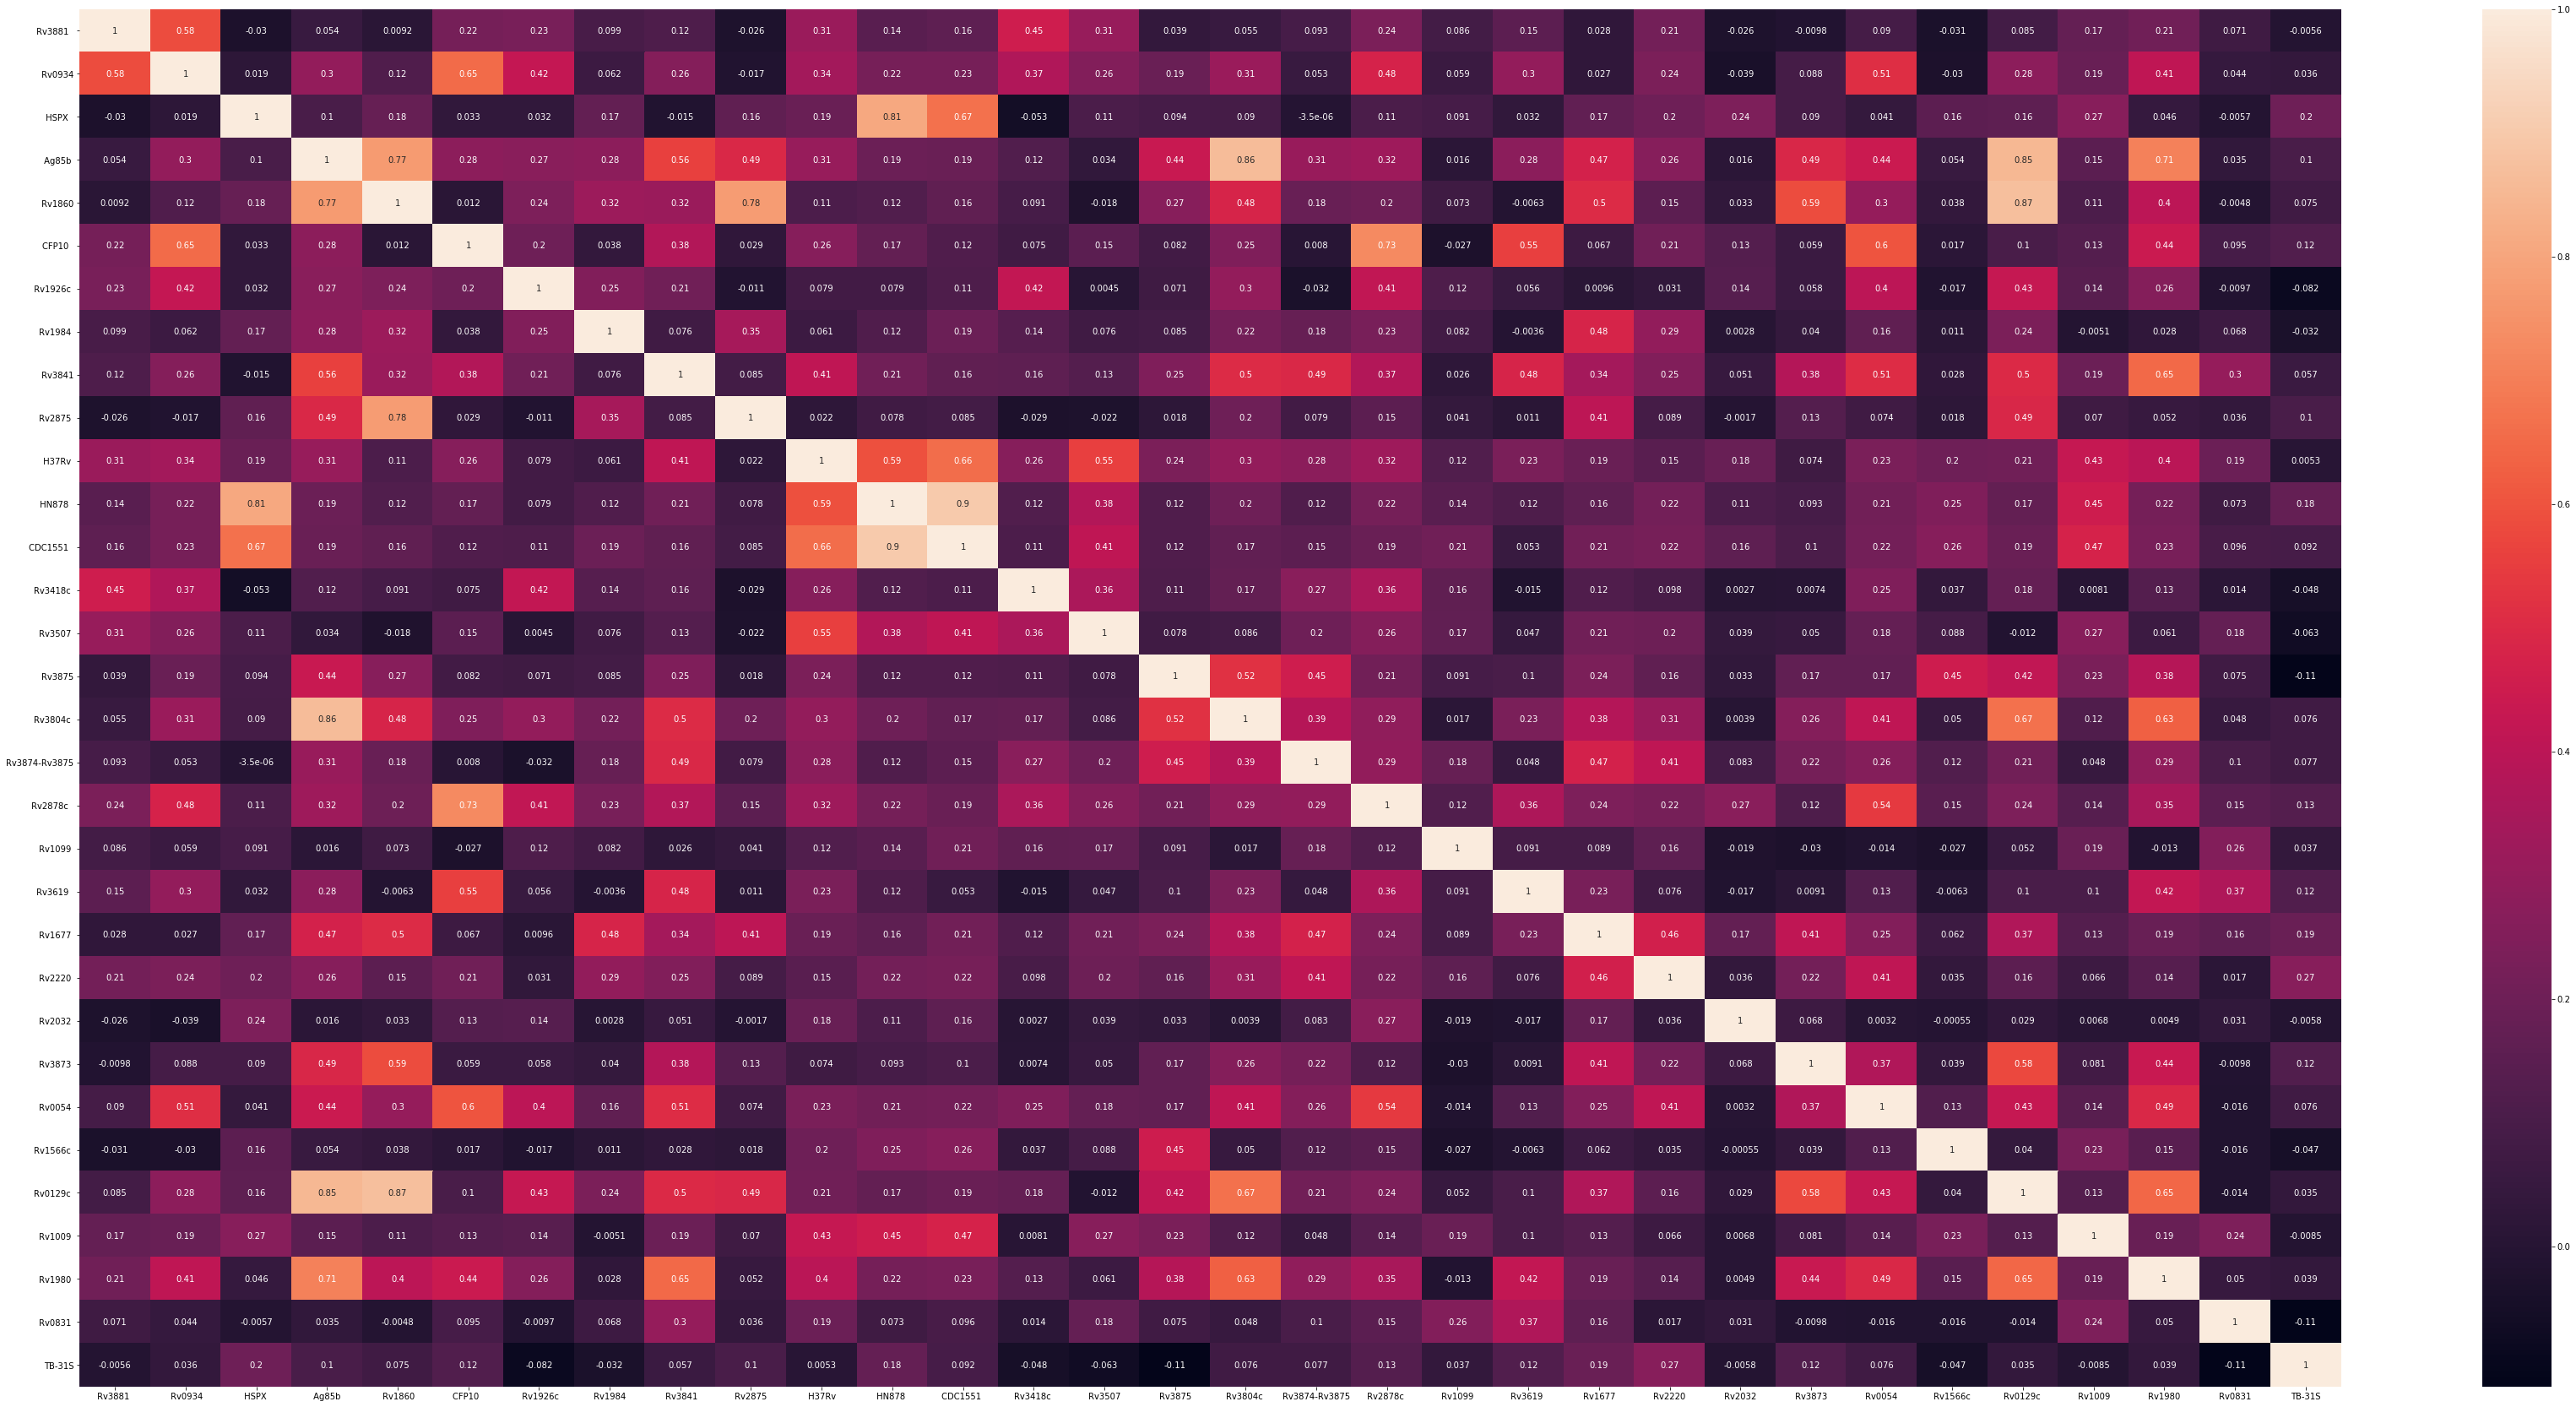

In [11]:
plt.figure(figsize=(60,30)) 
sns.heatmap(df.corr(), annot=True) 